## Lab | Logisitc Regression, Handling Imbalanced Data

For this lab we will build a model on customer churn binary classification problem. You will be using `Data/DATA_Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic Regression model on the training data.
 
 Round 2
  - Fit a Decision Tree Classifier on the training data.
  - Check the accuracy on the test data.

 Round 3
 -  apply K-fold cross validation on your Decision Tree Classifier and check the model score.
 -  fit a Random forest Classifier on the data and compare the accuracy.
**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
churnData=pd.read_csv("Data/DATA_Customer-Churn.csv" )
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


#### Data preparation

In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
churnData['TotalCharges'] =  pd.to_numeric(churnData['TotalCharges'], errors='coerce') 

In [5]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#fill NaN in TotalCharges with mean

#print('Number of NaNs:', churnData['TotalCharges'].isna().sum())
mean_totalcharges = np.mean(churnData['TotalCharges'])
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_totalcharges) 

In [7]:
print('Number of NaNs:', churnData['TotalCharges'].isna().sum())

Number of NaNs: 0


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

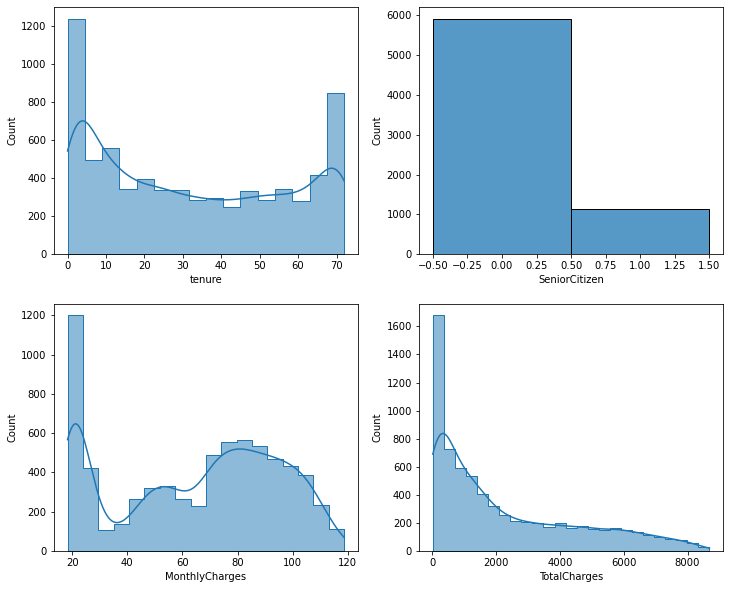

In [8]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
sns.histplot(x='tenure', data=churnData, kde=True, element='step', ax=ax[0,0])
sns.histplot(x='SeniorCitizen', data=churnData, element='bars',discrete=True, ax=ax[0,1])
sns.histplot(x='MonthlyCharges', data=churnData, kde=True, element='step', ax=ax[1,0])
sns.histplot(x='TotalCharges', data=churnData, kde=True, element='step', ax=ax[1,1])

<AxesSubplot:xlabel='Churn', ylabel='Count'>

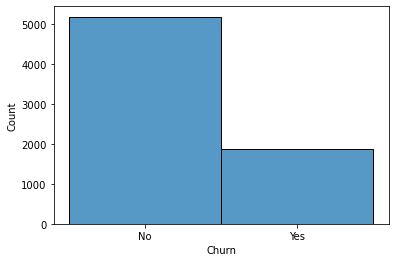

In [9]:
sns.histplot(x='Churn', data=churnData, element='bars')

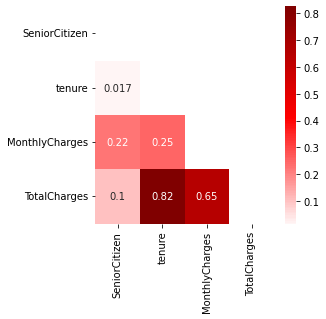

In [10]:
corr = churnData.corr() # returns a dataframe with the correlation values
matrix = np.triu(corr) # sets all the values of the lower triangle (under the main diagonal) to 0 (= False)

fig, ax = plt.subplots(1,1, figsize=(4,4))

sns.heatmap(
    corr,  # the data for the heatmap
    annot=True,  # show the actual values of correlation
    cmap='seismic',  # provide the 'seismic' colormap
    center=0,  # specify the value at which to center the colormap
    fmt='.2g', # specify the format for the annotation 
    mask=matrix # hides the values where mask = True (= upper triangle)
           )
plt.show()

#### Xy Split

In [11]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn'] #Target feature

#### Train Test Split

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=42)

#### Scaling

In [13]:
std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.790264,0.793658
1,Precision,0.648803,0.682540
2,Recall,0.439382,0.449477


Confusion matrix for the train set


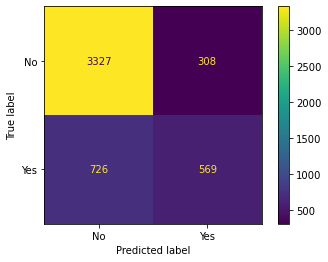



Confusion matrix for the test set


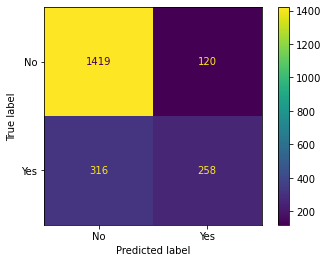

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1539
         Yes       0.68      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log = LogisticRegression() 

log.fit(X_train_scaled, y_train)

y_pred_train_log = log.predict(X_train_scaled)
y_pred_test_log = log.predict(X_test_scaled)


performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label='Yes')]})



display(performance_log)

print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_log))
#plot_confusion_matrix(log,X_train, y_train, values_format = 'd', cmap='inferno') #old version plot_confusion_matrix
#plt.show()

cm = confusion_matrix(y_train, y_pred_train_log,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()


print()
print()

print("Confusion matrix for the test set")
#print(confusion_matrix(y_test, y_pred_test_log))
#plot_confusion_matrix(log,X_test,y_test, values_format = 'd', cmap='inferno')
#plt.show()

cm = confusion_matrix(y_test, y_pred_test_log, labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_test_log))

### Decision Tree Classifier

,Error_metric,Train,Test
0,Accuracy,0.786410,0.774255
1,Precision,0.676901,0.661130
2,Recall,0.357529,0.346690


Confusion matrix for the train set


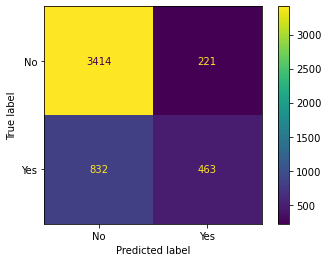



Confusion matrix for the test set


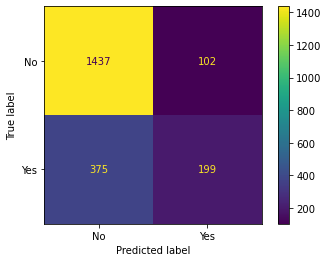

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1539
         Yes       0.66      0.35      0.45       574

    accuracy                           0.77      2113
   macro avg       0.73      0.64      0.66      2113
weighted avg       0.76      0.77      0.75      2113



In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(X_train_scaled, y_train)

y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)

performance_dt = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})



display(performance_dt)

print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt))
cm = confusion_matrix(y_train, y_pred_train_dt,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

print()
print()

print("Confusion matrix for the test set")
#print(confusion_matrix(y_test, y_pred_test_dt))
cm = confusion_matrix(y_test, y_pred_test_dt,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_test_dt))

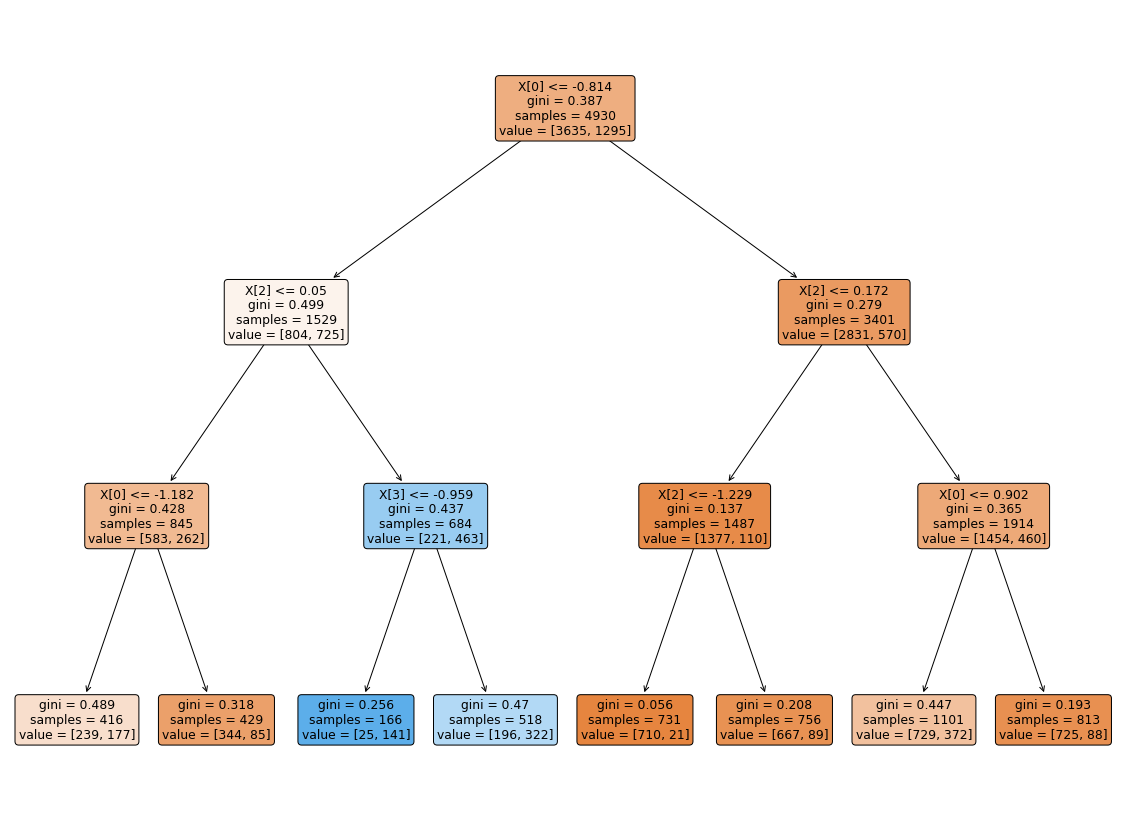

In [16]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,15))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

### Cross Validation on Decision Tree Classifier

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import statistics as stats

model=dt

scores=cross_val_score(model, X, y, cv=10)
scores

array([0.77730496, 0.79574468, 0.77730496, 0.796875  , 0.77272727,
       0.76420455, 0.78693182, 0.78267045, 0.78409091, 0.79261364])

In [18]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.01


In [19]:
y_pred = cross_val_predict(model, X, y, cv=10)
stats.mode(y_pred)


'No'

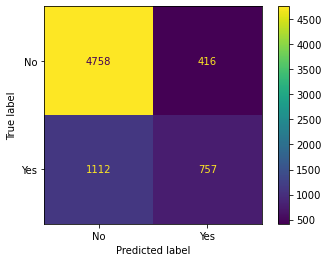

              precision    recall  f1-score   support

          No       0.81      0.92      0.86      5174
         Yes       0.65      0.41      0.50      1869

    accuracy                           0.78      7043
   macro avg       0.73      0.66      0.68      7043
weighted avg       0.77      0.78      0.77      7043



In [20]:
cm = confusion_matrix(y, y_pred, labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

print(classification_report(y, y_pred))

### Random Forest Classifier

,Error_metric,Train,Test
0,Accuracy,0.786410,0.774255
1,Precision,0.676901,0.661130
2,Recall,0.357529,0.346690


Confusion matrix for the train set


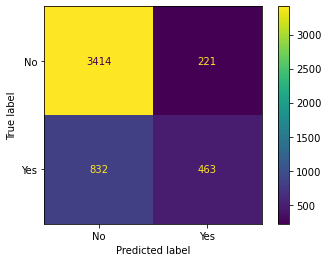



Confusion matrix for the test set


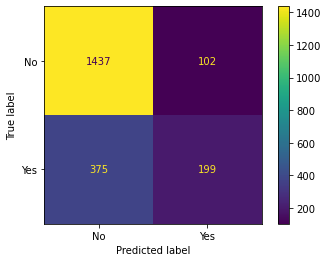

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1539
         Yes       0.66      0.35      0.45       574

    accuracy                           0.77      2113
   macro avg       0.73      0.64      0.66      2113
weighted avg       0.76      0.77      0.75      2113



In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred_train_rf = dt.predict(X_train_scaled)
y_pred_test_rf = dt.predict(X_test_scaled)

performance_rf = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_rf),
                                         precision_score(y_train, y_pred_train_rf, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_rf, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_rf),
                                        precision_score(y_test, y_pred_test_rf, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_rf, pos_label='Yes')]})



display(performance_rf)

print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt))
cm = confusion_matrix(y_train, y_pred_train_rf,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

print()
print()

print("Confusion matrix for the test set")
#print(confusion_matrix(y_test, y_pred_test_dt))
cm = confusion_matrix(y_test, y_pred_test_rf,labels=log.classes_) #new version: confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred_test_rf))

### Using Grid search to check for best set of parameters

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

In [23]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)

In [24]:
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [25]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

#### apply best set of parameters

In [26]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2,
 n_estimators=100, random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred_train_rf = dt.predict(X_train_scaled)
y_pred_test_rf = dt.predict(X_test_scaled)
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1539
         Yes       0.66      0.35      0.45       574

    accuracy                           0.77      2113
   macro avg       0.73      0.64      0.66      2113
weighted avg       0.76      0.77      0.75      2113



## Resampling -  Downsamling

In [27]:
category_y = churnData[churnData['Churn'] == 'Yes']
category_n = churnData[churnData['Churn'] == 'No']

In [28]:
print(category_y.shape)
print(category_n.shape)

(1869, 16)
(5174, 16)


In [29]:
category_n_down = category_n.sample(len(category_y))


In [30]:
churnData_new = pd.concat([category_n_down, category_y], axis=0)
#shuffling the data
churnData_ds = churnData_new.sample(frac=1)
churnData_ds['Churn'].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

#### rerun Logistic Regression model 

In [31]:
X = churnData_ds[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData_ds['Churn']


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=42)

std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

log = LogisticRegression() 
log.fit(X_train_scaled, y_train)
y_pred_train_log = log.predict(X_train_scaled)
y_pred_test_log = log.predict(X_test_scaled)

print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

          No       0.74      0.72      0.73       567
         Yes       0.72      0.75      0.73       555

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



#### rerun Decision tree model

In [32]:
X = churnData_ds[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData_ds['Churn']


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=42)

std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(X_train_scaled, y_train)

y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)

print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

          No       0.79      0.67      0.73       567
         Yes       0.71      0.81      0.76       555

    accuracy                           0.74      1122
   macro avg       0.75      0.74      0.74      1122
weighted avg       0.75      0.74      0.74      1122



### Using Tomek Links 

In [33]:
from imblearn.under_sampling import TomekLinks 

X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=42)

std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

y_train.value_counts()

No     3635
Yes    1295
Name: Churn, dtype: int64

In [34]:
tl = TomekLinks(sampling_strategy='majority')
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
y_train_tl.value_counts()

No     3266
Yes    1295
Name: Churn, dtype: int64

In [35]:
X_train_tl2, y_train_tl2 = tl.fit_resample(X_train_tl, y_train_tl)
y_train_tl2.value_counts()

No     3143
Yes    1295
Name: Churn, dtype: int64

#### rerun Logistic Regression model 

In [36]:
log = LogisticRegression() 
log.fit(X_train_tl2, y_train_tl2)
y_pred_train_log = log.predict(X_train_tl2)
y_pred_test_log = log.predict(X_test)
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

          No       0.87      0.71      0.79      1539
         Yes       0.49      0.72      0.58       574

    accuracy                           0.72      2113
   macro avg       0.68      0.72      0.68      2113
weighted avg       0.77      0.72      0.73      2113



#### rerun Decision tree model

In [37]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_tl2, y_train_tl2)
y_pred_train_dt = dt.predict(X_train_tl2)
y_pred_test_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

          No       0.36      0.05      0.08      1539
         Yes       0.23      0.78      0.36       574

    accuracy                           0.25      2113
   macro avg       0.30      0.41      0.22      2113
weighted avg       0.33      0.25      0.16      2113



### Upsampling
Using SMOTE - Synthetic Minority Over-sampling Technique

In [38]:
from imblearn.over_sampling import SMOTE

X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30, random_state=42)

std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

y_train.value_counts()

No     3635
Yes    1295
Name: Churn, dtype: int64

In [39]:
smote=SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
y_train_sm.value_counts()

No     3635
Yes    3635
Name: Churn, dtype: int64

In [40]:
len(X_train_sm)

7270

#### rerun Logistic Regression model 

In [41]:
log = LogisticRegression() 
log.fit(X_train_sm, y_train_sm)
y_pred_train_log = log.predict(X_train_sm)
y_pred_test_log = log.predict(X_test_scaled)
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1539
         Yes       0.51      0.76      0.61       574

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113



#### rerun Decision tree model

In [42]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_sm, y_train_sm)
y_pred_train_dt = dt.predict(X_train_sm)
y_pred_test_dt = dt.predict(X_test_scaled)
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

          No       0.90      0.64      0.75      1539
         Yes       0.46      0.81      0.59       574

    accuracy                           0.69      2113
   macro avg       0.68      0.73      0.67      2113
weighted avg       0.78      0.69      0.71      2113



## Dropping features

In [43]:
feature_names = X_train.columns
feature_names = list(feature_names)
df = pd.DataFrame(list(zip(feature_names, dt.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
0,tenure,0.655786
2,MonthlyCharges,0.344214
1,SeniorCitizen,0.000000
3,TotalCharges,0.000000


drop 'totalCharges' and 'SeniorCitizen'

In [44]:
Xi = churnData[['MonthlyCharges', 'tenure']]
yi = churnData['Churn'] #Target feature

In [45]:
Xi_train, Xi_test, yi_train, yi_test=train_test_split(Xi, yi, test_size=.30, random_state=42)

In [46]:
std_scaler=StandardScaler().fit(Xi_train) 
Xi_train_scaled=std_scaler.transform(Xi_train)
Xi_test_scaled=std_scaler.transform(Xi_test)

#### Logitsic Regression

In [47]:
log = LogisticRegression() 
log.fit(Xi_train_scaled, yi_train)
yi_pred_train_log = log.predict(Xi_train_scaled)
yi_pred_test_log = log.predict(Xi_test_scaled)
print(classification_report(yi_test, yi_pred_test_log))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1539
         Yes       0.66      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.77      2113



#### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(Xi_train_scaled, yi_train)
yi_pred_train_dt = dt.predict(Xi_train_scaled)
yi_pred_test_dt = dt.predict(Xi_test_scaled)
print(classification_report(yi_test, yi_pred_test_dt))

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1539
         Yes       0.66      0.35      0.45       574

    accuracy                           0.77      2113
   macro avg       0.73      0.64      0.66      2113
weighted avg       0.76      0.77      0.75      2113



#### Upsampling with SMOTE

In [49]:
smote=SMOTE(random_state=42)

Xi_train_sm, yi_train_sm = smote.fit_resample(Xi_train_scaled, yi_train)
yi_train_sm.value_counts()

No     3635
Yes    3635
Name: Churn, dtype: int64

In [50]:
log = LogisticRegression() 
log.fit(Xi_train_sm, yi_train_sm)
yi_pred_train_log = log.predict(Xi_train_sm)
yi_pred_test_log = log.predict(Xi_test_scaled)
print(classification_report(yi_test, yi_pred_test_log))

              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1539
         Yes       0.51      0.75      0.60       574

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.78      0.74      0.75      2113



In [51]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(Xi_train_sm, yi_train_sm)
yi_pred_train_dt = dt.predict(Xi_train_sm)
yi_pred_test_dt = dt.predict(Xi_test_scaled)
print(classification_report(yi_test, yi_pred_test_dt))

              precision    recall  f1-score   support

          No       0.91      0.63      0.75      1539
         Yes       0.46      0.82      0.59       574

    accuracy                           0.69      2113
   macro avg       0.68      0.73      0.67      2113
weighted avg       0.78      0.69      0.70      2113

